In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("./sources/employee_data.csv")
df.head()

,Name,Age,Salary,Department,Experience
0,Amit,31.0,-5699.0,Finance,NaN
1,Arjun,NaN,10000000.0,Finance,NaN
2,Neha,NaN,10000000.0,HR,3.0
3,John,200.0,10000000.0,HR,14.0
4,Priya,37.0,NaN,HR,NaN


In [3]:
print("---Misisng values ---")
df.isnull().sum()

---Misisng values ---


Name           0
Age           65
Salary        40
Department     0
Experience    95
dtype: int64

In [4]:
df.rename(columns={'Experience':'Exp'},inplace=True)


In [5]:
print("---Filled Missing values---")
# it  will fill the blank age cells with median of the others cells in real file
# df['Age'].fillna(df['Age'].median(), inplace=True)
df['Age'] = df['Age'].fillna(df['Age'].median())

#it  will fill the blank Salary cells with mean of the others cells in real file
df['Salary'] = df['Salary'].fillna(df['Salary'].median())


df['Exp']=df['Exp'].fillna(df['Exp'].median())

#inf and -inf-> nan
df.replace([np.inf,-np.inf],np.nan,inplace=True)


"""Removing Duplicate values"""
df.drop_duplicates(inplace=True)

"""Replace neg value with avg 
                     (---condition---,-----code ------- ,column)"""
df['Salary']=np.where(df['Salary']<0,df['Salary'].mean(),df['Salary'])

#IQR method
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


""" Revoming the rows whose salary are too high too low """
df = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]


df.to_csv('cleaned_dataset.csv')
print("Dateset cleaned")

---Filled Missing values---
Dateset cleaned


In [6]:
df=pd.read_csv("cleaned_dataset.csv")
df

,Unnamed: 0,Name,Age,Salary,Department,Exp
0,0,Amit,31.0,2.763688e+06,Finance,9.0
1,1,Arjun,55.0,1.000000e+07,Finance,9.0
2,2,Neha,55.0,1.000000e+07,HR,3.0
3,3,John,200.0,1.000000e+07,HR,14.0
4,4,Priya,37.0,8.476200e+04,HR,9.0
...,...,...,...,...,...,...
127,155,John,36.0,8.476200e+04,Support,9.0
128,156,Tom,200.0,2.763688e+06,Support,18.0
129,157,Neha,60.0,8.476200e+04,Sales,9.0
130,158,Amit,55.0,8.359200e+04,Admin,19.0


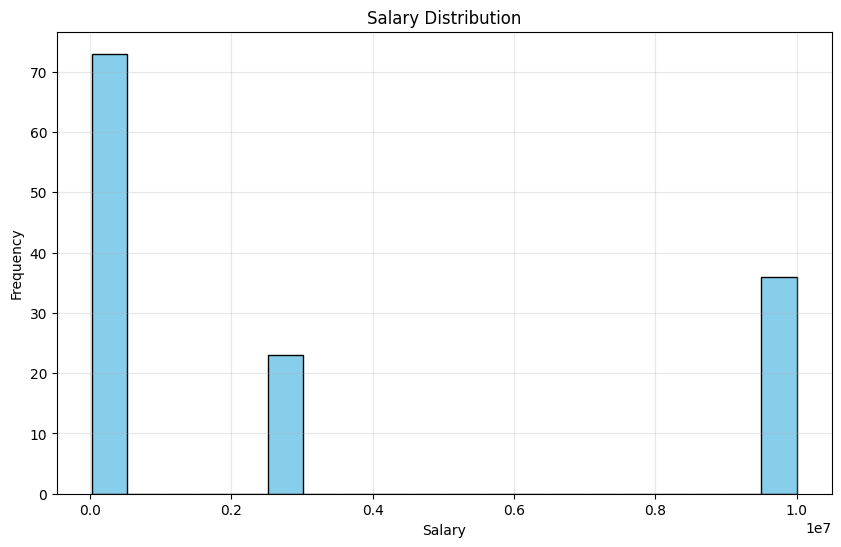

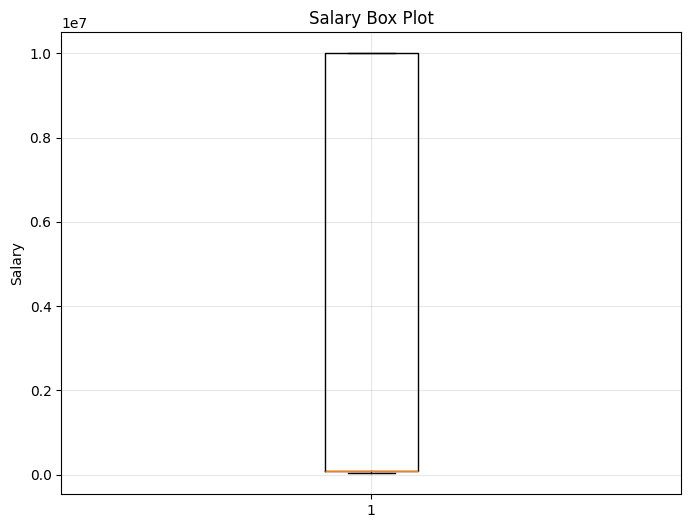

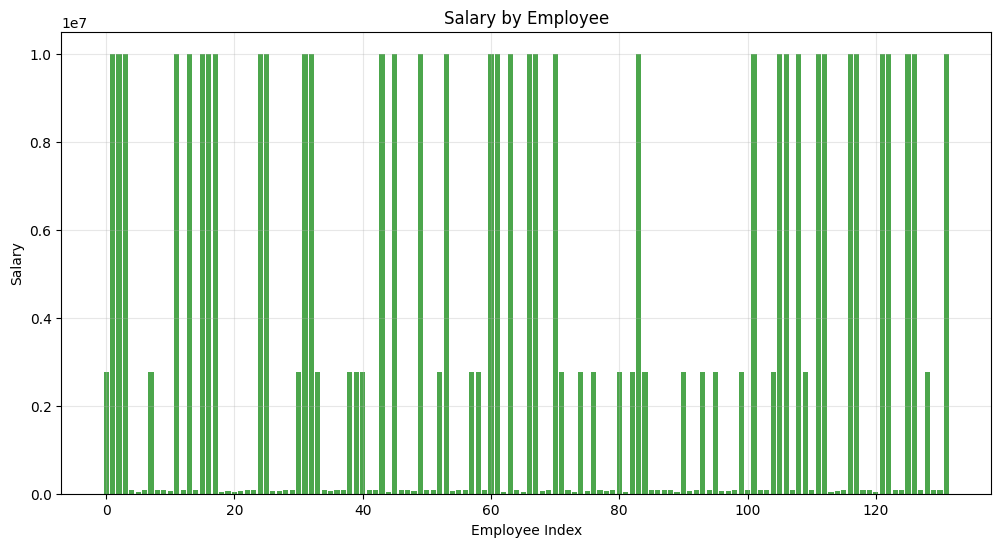

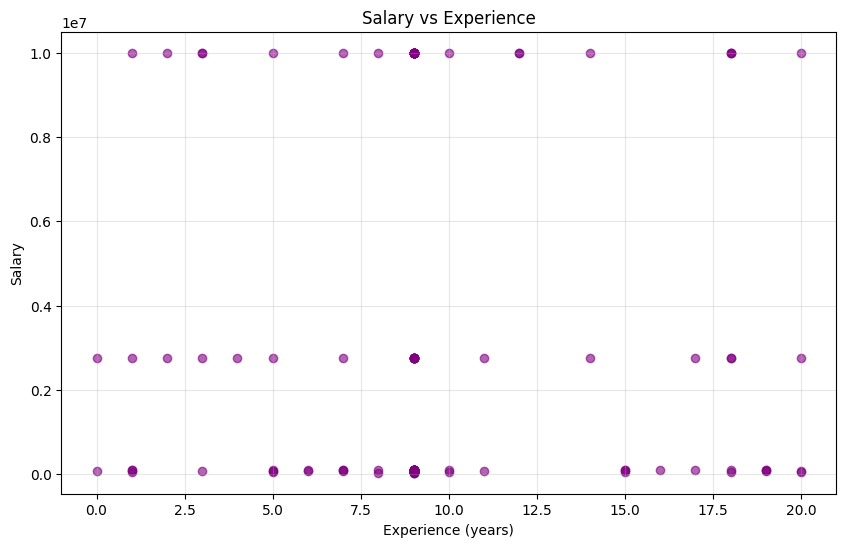

In [7]:
# Method 1: Histogram - Distribution of salaries
plt.figure(figsize=(10, 6))
plt.hist(df['Salary'], bins=20, edgecolor='black', color='skyblue')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.grid(True, alpha=0.3)
plt.show()

# Method 2: Box plot - Shows median, quartiles, and outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df['Salary'])
plt.ylabel('Salary')
plt.title('Salary Box Plot')
plt.grid(True, alpha=0.3)
plt.show()

# Method 3: Bar chart - If you want to see salary by employee
plt.figure(figsize=(12, 6))
plt.bar(range(len(df)), df['Salary'], color='green', alpha=0.7)
plt.xlabel('Employee Index')
plt.ylabel('Salary')
plt.title('Salary by Employee')
plt.grid(True, alpha=0.3)
plt.show()

# Method 4: Scatter plot - Salary vs Experience (if you want to see relationship)
plt.figure(figsize=(10, 6))
plt.scatter(df['Exp'], df['Salary'], alpha=0.6, color='purple')
plt.xlabel('Experience (years)')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.grid(True, alpha=0.3)
plt.show()